## ОДНОМЕРНОЕ УРАВНЕНИЕ ТЕПЛОПРОВОДНОСТИ С ПОДВИЖНОЙ ГРАНИЦЕЙ
##### (ПРОМЕРЗАНИЕВЛАЖНОГОГРУНТА)

Постановка задачи. 
Влажный грунт находится в талом состоянии и имеет начальную постоянную температуру <b>T<sub>0</sub></b>. В начальный момент времени на поверхности грунта внезапно устанавливается некоторая температура <b>T<sub>c</sub></b>, которая ниже температуры замерзания <b>T<sub>з</sub></b>. В результате образуется промерзший слой переменной толщины <b>ξ=f(t)</b>. Нижняя подвижная граница его всегда имеет температуру замерзания <b>T<sub>з</sub></b>. На этой границе происходит переход из одного агрегатного состояния в другое, на что требуется теплота перехода <b>Q<sub>ф</sub>, кДж/кг</b>. Таким образом, верхняя граница <b>(x=ξ)</b> талой зоны имеет постоянную температуру замерзания, а нижняя граница <b>(x=L)</b>  –  некоторую постоянную температуру грунта на большой его глубине. Коэффициенты переноса промерзшей и талой зон различны. Предполагается, что перенос тепла в грунте происходит только вследствие теплопроводности. 

In [1]:
from IPython.display import Image
display(Image(url='./chm1.png'))

На основе всего выше сказанного математическая постановка задачи примет вид: 

In [2]:
display(Image(url='./chm2.png'))

где <b>ρ</b> – плотность грунта, (кг/м<sup>3</sup>); <b>w</b> – влажность грунта, (кг/кг).


Постоянные температуры, участвующие в постановке задачи: T<sub>с</sub><T<sub>з</sub><T<sub>0</sub>. 
Сформулированную задачу будем решать методом ловли фронта в узел пространственной сетки. Для этого вводится равномерная пространственная сетка:

In [3]:
display(Image(url='./chm3.png'))

Также вводится неравномерная временная сетка:

In [4]:
display(Image(url='./chm4.png'))

Следует выбирать шаг по времени <b>τ<sub>n+1</sub>, n=0,1...M-1</b> таким, чтобы за этот временной промежуток граница фазового перехода сдвинулась ровно на один шаг пространственной сетки, тогда можно записать: 

In [5]:
display(Image(url='./chm5.png'))

In [1]:
import matplotlib.pyplot as plt

def sqr(h):
    return h**2

In [2]:
L   =  0.3        # глубина грунта

lambda1  =  2.3   # хар-ки промерзшего грунта
ro1  =  917       # 
c1  =  2090       #

lambda2  =  0.6   # хар-ки талого грунта
ro2  =  1000      #
c2  =  4220       #

T0  =  293        # хар-ные температуры
Tfr  =  273       #
Tc  =  268        #

Qfr   =  3.32e5   # теплота фазового перехода
w   =  1          # влажность


In [3]:
N = 150
t_end1 = 4316
t_end2 = 19464
t_end3 = 90875
t_end4 = 266246


h = L/(N-1)
a1 = lambda1/(ro1*c1)
a2 = lambda2/(ro2*c2)

eps = 1e-2

Tn, Ts = [0]*(N+1), [0]*(N+1)



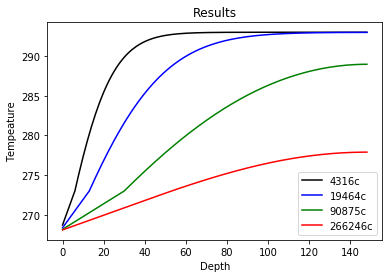

In [7]:
T = [T0]*(N+1)
alfa = [0]*(N+1)
beta = [0]*(N+1)

fig = plt.figure()
ax1 = fig.add_subplot(111)

time = 0

k = 1
times = []
while time < t_end1:
    for i in range(1,N+1):
        Tn[i] = T[i]
       
    k+=1

    max_ = 1
    while max_ > eps:
        
        for i in range(1,N+1):
            Ts[i] = T[i]
            
        tau=(2.0*a1*a2*Qfr*w*0.5*(ro1+ro2)*sqr(h)-sqr(h)*(lambda1*a2+lambda2*a1)*(Tfr-Tn[k]))/(2.0*a1*a2*(lambda1*(Tfr-T[k-1])-lambda2*(T[k+1]-Tfr)))
        #print(tau)         
    
        alfa[1] = 0;
        beta[1] = Tc;

        for i in range(2,k):
            ai = a1/sqr(h)
            bi = 2*a1/sqr(h)+1/tau
            ci = a1/sqr(h)
            fi = -Tn[i]/tau
            alfa[i] = ai/(bi-ci*alfa[i-1])
            beta[i] = (ci*beta[i-1]-fi)/(bi-ci*alfa[i-1])

        T[k] = Tfr
        
        for i in range(k-1,1,-1):
            T[i] = alfa[i]*T[i+1]+beta[i]

        alfa[k] = 0
        beta[k] = Tfr

        for i in range(k+1,N):
            ai = a2/sqr(h)
            bi = 2*a2/sqr(h)+1/tau
            ci = a2/sqr(h)
            fi = -Tn[i]/tau
            alfa[i] = ai/(bi-ci*alfa[i-1])
            beta[i] = (ci*beta[i-1]-fi)/(bi-ci*alfa[i-1])

        T[N] = (2*a2*tau*beta[N-1]+sqr(h)*Tn[N])/(2*a2*tau*(1-alfa[N-1])+sqr(h))

        for i in range(N-1,k,-1):
            T[i] = alfa[i]*T[i+1]+beta[i]
            
        max_ = max(abs(T[i]-Ts[i]) for i in range(1,N+1))
    time += tau
    times.append(time)
line1, = ax1.plot(range(N-1), T[2:], 'black', label="t = 4316")



while time < t_end2:
    for i in range(1,N+1):
        Tn[i] = T[i]
       
    k+=1

    max_ = 1
    while max_ > eps:
        
        for i in range(1,N+1):
            Ts[i] = T[i]

        tau=(2.0*a1*a2*Qfr*w*0.5*(ro1+ro2)*sqr(h)-sqr(h)*(lambda1*a2+lambda2*a1)*(Tfr-Tn[k]))/(2.0*a1*a2*(lambda1*(Tfr-T[k-1])-lambda2*(T[k+1]-Tfr)))
        #print(tau)         
        
        alfa[1] = 0;
        beta[1] = Tc;

        for i in range(2,k):
            ai = a1/sqr(h)
            bi = 2*a1/sqr(h)+1/tau
            ci = a1/sqr(h)
            fi = -Tn[i]/tau
            alfa[i] = ai/(bi-ci*alfa[i-1])
            beta[i] = (ci*beta[i-1]-fi)/(bi-ci*alfa[i-1])

        T[k] = Tfr
        
        for i in range(k-1,1,-1):
            T[i] = alfa[i]*T[i+1]+beta[i]

        alfa[k] = 0
        beta[k] = Tfr

        for i in range(k+1,N):
            ai = a2/sqr(h)
            bi = 2*a2/sqr(h)+1/tau
            ci = a2/sqr(h)
            fi = -Tn[i]/tau
            alfa[i] = ai/(bi-ci*alfa[i-1])
            beta[i] = (ci*beta[i-1]-fi)/(bi-ci*alfa[i-1])

        T[N] = (2*a2*tau*beta[N-1]+sqr(h)*Tn[N])/(2*a2*tau*(1-alfa[N-1])+sqr(h))

        for i in range(N-1,k,-1):
            T[i] = alfa[i]*T[i+1]+beta[i]
            
        max_ = max(abs(T[i]-Ts[i]) for i in range(1,N+1))
    time += tau
    times.append(time)
line2, = ax1.plot(range(N-1), T[2:], 'blue', label="t = 19464")



while time < t_end3:
    for i in range(1,N+1):
        Tn[i] = T[i]
       
    k+=1

    max_ = 1
    while max_ > eps:
        
        for i in range(1,N+1):
            Ts[i] = T[i]

        tau=(2.0*a1*a2*Qfr*w*0.5*(ro1+ro2)*sqr(h)-sqr(h)*(lambda1*a2+lambda2*a1)*(Tfr-Tn[k]))/(2.0*a1*a2*(lambda1*(Tfr-T[k-1])-lambda2*(T[k+1]-Tfr)))
        #print(tau)         
        
        alfa[1] = 0;
        beta[1] = Tc;

        for i in range(2,k):
            ai = a1/sqr(h)
            bi = 2*a1/sqr(h)+1/tau
            ci = a1/sqr(h)
            fi = -Tn[i]/tau
            alfa[i] = ai/(bi-ci*alfa[i-1])
            beta[i] = (ci*beta[i-1]-fi)/(bi-ci*alfa[i-1])

        T[k] = Tfr
        
        for i in range(k-1,1,-1):
            T[i] = alfa[i]*T[i+1]+beta[i]

        alfa[k] = 0
        beta[k] = Tfr

        for i in range(k+1,N):
            ai = a2/sqr(h)
            bi = 2*a2/sqr(h)+1/tau
            ci = a2/sqr(h)
            fi = -Tn[i]/tau
            alfa[i] = ai/(bi-ci*alfa[i-1])
            beta[i] = (ci*beta[i-1]-fi)/(bi-ci*alfa[i-1])

        T[N] = (2*a2*tau*beta[N-1]+sqr(h)*Tn[N])/(2*a2*tau*(1-alfa[N-1])+sqr(h))

        for i in range(N-1,k,-1):
            T[i] = alfa[i]*T[i+1]+beta[i]
            
        max_ = max(abs(T[i]-Ts[i]) for i in range(1,N+1))
    time += tau
    times.append(time)
line3, = ax1.plot(range(N-1), T[2:], 'green', label="t = 90875")



while time < t_end4:
    for i in range(1,N+1):
        Tn[i] = T[i]
       
    k+=1

    max_ = 1
    while max_ > eps:
        
        for i in range(1,N+1):
            Ts[i] = T[i]

        tau=(2.0*a1*a2*Qfr*w*0.5*(ro1+ro2)*sqr(h)-sqr(h)*(lambda1*a2+lambda2*a1)*(Tfr-Tn[k]))/(2.0*a1*a2*(lambda1*(Tfr-T[k-1])-lambda2*(T[k+1]-Tfr)))
        #print(tau)         
        
        alfa[1] = 0;
        beta[1] = Tc;

        for i in range(2,k):
            ai = a1/sqr(h)
            bi = 2*a1/sqr(h)+1/tau
            ci = a1/sqr(h)
            fi = -Tn[i]/tau
            alfa[i] = ai/(bi-ci*alfa[i-1])
            beta[i] = (ci*beta[i-1]-fi)/(bi-ci*alfa[i-1])

        T[k] = Tfr
        
        for i in range(k-1,1,-1):
            T[i] = alfa[i]*T[i+1]+beta[i]

        alfa[k] = 0
        beta[k] = Tfr

        for i in range(k+1,N):
            ai = a2/sqr(h)
            bi = 2*a2/sqr(h)+1/tau
            ci = a2/sqr(h)
            fi = -Tn[i]/tau
            alfa[i] = ai/(bi-ci*alfa[i-1])
            beta[i] = (ci*beta[i-1]-fi)/(bi-ci*alfa[i-1])

        T[N] = (2*a2*tau*beta[N-1]+sqr(h)*Tn[N])/(2*a2*tau*(1-alfa[N-1])+sqr(h))

        for i in range(N-1,k,-1):
            T[i] = alfa[i]*T[i+1]+beta[i]
            
        max_ = max(abs(T[i]-Ts[i]) for i in range(1,N+1))
    time += tau
    times.append(time)
line4, = ax1.plot(range(N-1), T[2:], 'red', label="t = 266246")


plt.title('Results')
plt.legend((line1, line2, line3, line4), ('4316c', '19464c', '90875c', '266246c'))

plt.ylabel('Tempeature')
plt.xlabel('Depth')


plt.show()

In [8]:
times[:70]

[-32.25591677031028,
 466.510810539613,
 1084.6183383388072,
 1870.1842008853837,
 2845.4764157195523,
 4015.565924198392,
 5379.915714839226,
 6940.662490298118,
 8694.73886987642,
 10646.320932981796,
 12794.329360335138,
 15136.344927556926,
 17672.766184494252,
 20409.60567239073,
 23335.848264538254,
 26462.575387553727,
 29782.396680692353,
 33296.83079810434,
 37012.317559719886,
 40919.8989601662,
 45020.47156556999,
 49314.74836504572,
 53809.95619917803,
 58501.64601718972,
 63382.351310798666,
 68455.14706954776,
 73722.26141623162,
 79177.98183650381,
 84814.32070752431,
 90636.23013181592,
 96638.30051107534,
 102816.40561479419,
 109161.3338035679,
 115667.8096768395,
 122328.44536914387,
 129135.51281192235,
 136081.46212917866,
 143147.22364313653,
 150334.86334121934,
 157631.68060873306,
 165023.47454758594,
 172511.3904381945,
 180086.03490014258,
 187748.6904001753,
 195471.73849472887,
 203261.39692013842,
 211110.28475357938,
 219013.2342221657,
 226965.7229291941